<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment (Problem 2) - Sentiment Analysis Model (Group)</h2><h3>AY2019/20 Semester</h3></th>
    </tr>
</table>

In [50]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.layers import Embedding, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [24]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('Mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [25]:
# load the dataset
dat = pd.read_csv('dataset.csv', delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

In [26]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [27]:
# Convert the texts and labels into numeric tensors
maxlen = 20  # Cut each tweet after 20 words
max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
word_index = tokenizer.word_index

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

X = pad_sequences(sequences, maxlen=maxlen)
y = np.asarray(labels)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 56702 unique tokens.
Shape of data tensor: (42546, 20)
Shape of label tensor: (42546,)


In [28]:
# Sample Tweet
print(texts[4])
print(X[4])
print(y[4])

Maxwell heads home @ Summa Akron City Hospital

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
 9596 3878   89 9597   75 1722]
0


In [29]:
glove_dir = "C:/Users/Kevin/Documents/Deep Learning/Data/glove.6B"
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
embedding_dim = 50
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all zeros
            embedding_matrix[i] = embedding_vector

In [31]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.43718001  0.37994999  0.41909    ...  0.30537999  1.10309994
  -0.61768001]
 [-0.59097999 -0.68475997 -0.16461    ... -0.33649999 -0.77178001
  -0.13447   ]]


### 1.3 Data Sampling

In [32]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student) 

### Model#1 (Student Name: Kevin Toh)

### Underfit

In [40]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(max_words, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(5, activation='softmax'))
model.summary()A

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 20, 64)            29440     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 562,789
Trainable params: 562,789
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [42]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/10
27228/27228 [==============================] - 16s 575us/step - loss: 1.3015 - acc: 0.4687 - val_loss: 1.2407 - val_acc: 0.4919
Epoch 2/10
27228/27228 [==============================] - 14s 505us/step - loss: 1.2289 - acc: 0.5011 - val_loss: 1.2082 - val_acc: 0.5087
Epoch 3/10
27228/27228 [==============================] - 14s 506us/step - loss: 1.2004 - acc: 0.5158 - val_loss: 1.2009 - val_acc: 0.5118
Epoch 4/10
27228/27228 [==============================] - 14s 505us/step - loss: 1.1735 - acc: 0.5305 - val_loss: 1.1773 - val_acc: 0.5256
Epoch 5/10
27228/27228 [==============================] - 14s 503us/step - loss: 1.1524 - acc: 0.5392 - val_loss: 1.1631 - val_acc: 0.5300
Epoch 6/10
27228/27228 [==============================] - 14s 525us/step - loss: 1.1299 - acc: 0.5472 - val_loss: 1.1579 - val_acc: 0.5303
Epoch 7/10
27228/27228 [==============================] - 14s 516us/step - loss: 1.1097 - acc: 0.5558 - val_loss: 1.1

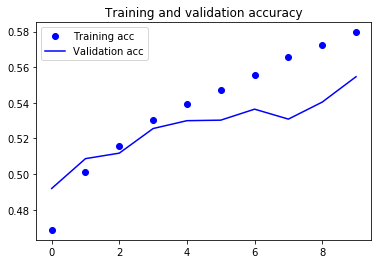

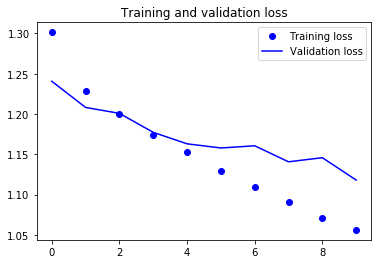

In [44]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Overfit

In [51]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.LSTM(256))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 256)           314368    
_________________________________________________________________
lstm_14 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 1,340,965
Trainable params: 1,340,965
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [53]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [54]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 30s 1ms/step - loss: 1.3012 - acc: 0.4684 - val_loss: 1.2454 - val_acc: 0.4884
Epoch 2/20
27228/27228 [==============================] - 28s 1ms/step - loss: 1.2262 - acc: 0.5061 - val_loss: 1.2176 - val_acc: 0.5132
Epoch 3/20
27228/27228 [==============================] - 28s 1ms/step - loss: 1.1873 - acc: 0.5229 - val_loss: 1.2130 - val_acc: 0.5141
Epoch 4/20
27228/27228 [==============================] - 28s 1ms/step - loss: 1.1508 - acc: 0.5391 - val_loss: 1.1552 - val_acc: 0.5367
Epoch 5/20
27228/27228 [==============================] - 27s 1ms/step - loss: 1.1143 - acc: 0.5536 - val_loss: 1.1747 - val_acc: 0.5304
Epoch 6/20
27228/27228 [==============================] - 28s 1ms/step - loss: 1.0740 - acc: 0.5713 - val_loss: 1.1845 - val_acc: 0.5253
Epoch 7/20
27228/27228 [==============================] - 31s 1ms/step - loss: 1.0332 - acc: 0.5916 - val_loss: 1.1201 - val_acc:

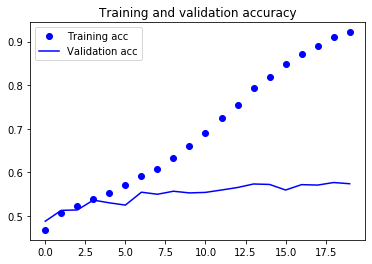

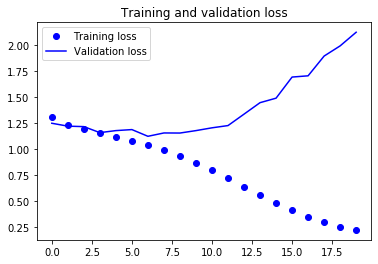

In [60]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine Tuning

In [61]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.LSTM(256))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 20, 256)           314368    
_________________________________________________________________
lstm_16 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 1285      
Total params: 1,340,965
Trainable params: 1,340,965
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [63]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [64]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 31s 1ms/step - loss: 1.2498 - acc: 0.4900 - val_loss: 1.1591 - val_acc: 0.5397
Epoch 2/20
27228/27228 [==============================] - 28s 1ms/step - loss: 1.0543 - acc: 0.5759 - val_loss: 1.0252 - val_acc: 0.5825
Epoch 3/20
27228/27228 [==============================] - 28s 1ms/step - loss: 0.9513 - acc: 0.6139 - val_loss: 1.0123 - val_acc: 0.5975
Epoch 4/20
27228/27228 [==============================] - 28s 1ms/step - loss: 0.8874 - acc: 0.6428 - val_loss: 0.9686 - val_acc: 0.6169
Epoch 5/20
27228/27228 [==============================] - 28s 1ms/step - loss: 0.8286 - acc: 0.6696 - val_loss: 0.9712 - val_acc: 0.6188
Epoch 6/20
27228/27228 [==============================] - 28s 1ms/step - loss: 0.7709 - acc: 0.6958 - val_loss: 0.9897 - val_acc: 0.6184
Epoch 7/20
27228/27228 [==============================] - 28s 1ms/step - loss: 0.7119 - acc: 0.7215 - val_loss: 1.0361 - val_acc:

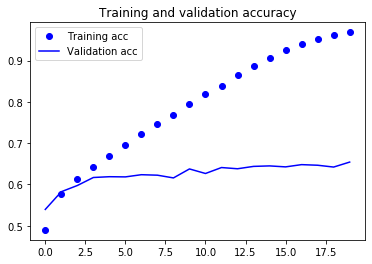

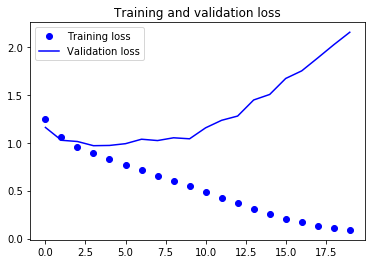

In [65]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
# Save the Model
model.save('text_model_1.h5')

### Model#2 (Student Name: XXXX)

### Underfit

In [66]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.GRU(32, return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
gru_3 (GRU)                  (None, 20, 32)            7968      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
Total params: 514,373
Trainable params: 514,373
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [68]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [69]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 15s 534us/step - loss: 1.3203 - acc: 0.4579 - val_loss: 1.2511 - val_acc: 0.4884
Epoch 2/20
27228/27228 [==============================] - 11s 417us/step - loss: 1.2322 - acc: 0.4989 - val_loss: 1.2132 - val_acc: 0.5043
Epoch 3/20
27228/27228 [==============================] - 11s 419us/step - loss: 1.2003 - acc: 0.5148 - val_loss: 1.1955 - val_acc: 0.5151
Epoch 4/20
27228/27228 [==============================] - 12s 424us/step - loss: 1.1777 - acc: 0.5273 - val_loss: 1.1745 - val_acc: 0.5210
Epoch 5/20
27228/27228 [==============================] - 11s 422us/step - loss: 1.1602 - acc: 0.5356 - val_loss: 1.2017 - val_acc: 0.5071
Epoch 6/20
27228/27228 [==============================] - 12s 427us/step - loss: 1.1466 - acc: 0.5407 - val_loss: 1.1600 - val_acc: 0.5348
Epoch 7/20
27228/27228 [==============================] - 12s 433us/step - loss: 1.1346 - acc: 0.5446 - val_loss: 1.1

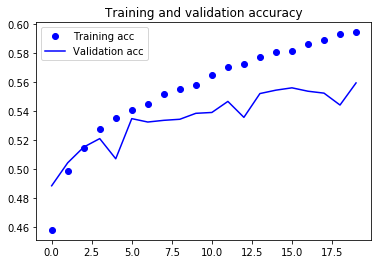

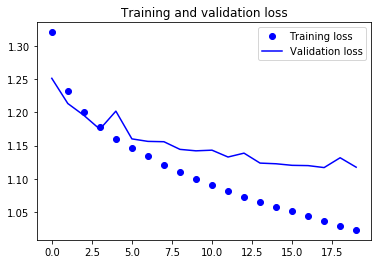

In [70]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Overfit

In [71]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.GRU(256, return_sequences=True))
model.add(layers.GRU(256))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
gru_5 (GRU)                  (None, 20, 256)           235776    
_________________________________________________________________
gru_6 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1285      
Total params: 1,131,045
Trainable params: 1,131,045
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [73]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [74]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 26s 938us/step - loss: 1.2960 - acc: 0.4699 - val_loss: 1.2554 - val_acc: 0.4858
Epoch 2/20
27228/27228 [==============================] - 23s 831us/step - loss: 1.2058 - acc: 0.5139 - val_loss: 1.1865 - val_acc: 0.5261
Epoch 3/20
27228/27228 [==============================] - 23s 828us/step - loss: 1.1513 - acc: 0.5369 - val_loss: 1.1481 - val_acc: 0.5311
Epoch 4/20
27228/27228 [==============================] - 23s 828us/step - loss: 1.1058 - acc: 0.5576 - val_loss: 1.1263 - val_acc: 0.5460
Epoch 5/20
27228/27228 [==============================] - 23s 827us/step - loss: 1.0546 - acc: 0.5793 - val_loss: 1.1439 - val_acc: 0.5438
Epoch 6/20
27228/27228 [==============================] - 22s 824us/step - loss: 1.0000 - acc: 0.6046 - val_loss: 1.1117 - val_acc: 0.5632
Epoch 7/20
27228/27228 [==============================] - 22s 824us/step - loss: 0.9332 - acc: 0.6341 - val_loss: 1.1

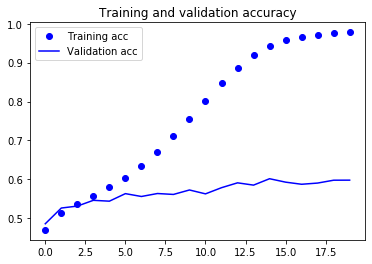

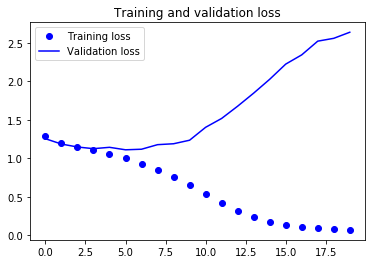

In [75]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine Tuning

In [76]:
# Build the Model
model = models.Sequential()
# model.add(layers.Embedding(10000, 16, input_length=maxlen))
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.GRU(256, return_sequences=True))
model.add(layers.GRU(256))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
gru_7 (GRU)                  (None, 20, 256)           235776    
_________________________________________________________________
gru_8 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 1285      
Total params: 1,131,045
Trainable params: 1,131,045
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True 

In [78]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [79]:
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 27228 samples, validate on 6808 samples
Epoch 1/20
27228/27228 [==============================] - 26s 969us/step - loss: 1.2514 - acc: 0.4933 - val_loss: 1.1758 - val_acc: 0.5216
Epoch 2/20
27228/27228 [==============================] - 23s 841us/step - loss: 1.0351 - acc: 0.5807 - val_loss: 1.0170 - val_acc: 0.5743
Epoch 3/20
27228/27228 [==============================] - 23s 842us/step - loss: 0.9343 - acc: 0.6240 - val_loss: 0.9785 - val_acc: 0.6027
Epoch 4/20
27228/27228 [==============================] - 23s 842us/step - loss: 0.8633 - acc: 0.6548 - val_loss: 0.9646 - val_acc: 0.6138
Epoch 5/20
27228/27228 [==============================] - 23s 841us/step - loss: 0.7946 - acc: 0.6888 - val_loss: 0.9764 - val_acc: 0.6246
Epoch 6/20
27228/27228 [==============================] - 23s 843us/step - loss: 0.7197 - acc: 0.7230 - val_loss: 0.9764 - val_acc: 0.6318
Epoch 7/20
27228/27228 [==============================] - 23s 844us/step - loss: 0.6412 - acc: 0.7548 - val_loss: 1.0

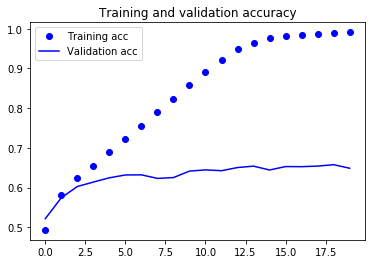

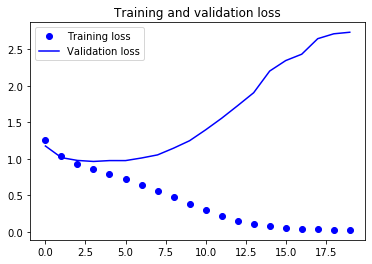

In [80]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
# Save the Model
model.save('text_model_2.h5')

### Model#3 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_3.h5')

### Model#4 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_4.h5')

### Model#5 (Student Name: XXXX)

In [ ]:
# Build the Model

In [ ]:
# Train the Model

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

In [ ]:
# Save the Model
model.save('text_model_5.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [49]:
# Model #1
model.load_weights('text_model_1.h5')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

8510/8510 [==============================] - 9s 1ms/step
test_loss: 2.0023443645371954
test_acc: 0.636427732177963


In [82]:
# Model #2
model.load_weights('text_model_2.h5')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

8510/8510 [==============================] - 8s 964us/step
test_loss: 2.671066783429873
test_acc: 0.6599294946840871


In [ ]:
# Model #3
model.load_weights('text_model_3.h5')



In [ ]:
# Model #4
model.load_weights('text_model_4.h5')



In [ ]:
# Model #5
model.load_weights('text_model_5.h5')



In [83]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [84]:
model.load_weights('text_model_best.h5')

In [121]:
# takes the user input
text_input = np.array([input()])

Oh my god this is so cool


In [122]:
# convert the user input into numeric tensor
prediction_sequences = tokenizer.texts_to_sequences(text_input)
padded_prediction_sequences = pad_sequences(prediction_sequences, maxlen=maxlen)

In [123]:
print(padded_prediction_sequences)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 180   3 302   9  16
   21 575]]


In [124]:
# show the model output using predict function
prediction = model.predict_classes(padded_prediction_sequences).item()
print("Predicted Label: {0}".format(prediction))
result = emoji_dictionary[prediction]
print("Predicted Emoji: {0}".format(result))

Predicted Label: 0
Predicted Emoji: 😍
